**🔹 Section 1: Data Loading & Exploration**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/eye_cancer_patients.csv')

In [3]:
df.head()

,Patient_ID,Age,Gender,Cancer_Type,Laterality,Date_of_Diagnosis,Stage_at_Diagnosis,Treatment_Type,Surgery_Status,Radiation_Therapy,Chemotherapy,Outcome_Status,Survival_Time_Months,Genetic_Markers,Family_History,Country
0,PID00001,58,F,Retinoblastoma,Left,2019-01-25,Stage IV,Radiation,False,15,3,Deceased,85,NaN,True,UK
1,PID00002,15,Other,Retinoblastoma,Right,2021-10-21,Stage III,Chemotherapy,True,69,6,In Remission,10,NaN,True,Japan
2,PID00003,64,M,Retinoblastoma,Bilateral,2021-03-12,Stage IV,Surgery,False,47,6,In Remission,3,BRAF Mutation,False,UK
3,PID00004,33,M,Melanoma,Right,2021-05-10,Stage II,Radiation,True,36,6,Active,40,NaN,False,Canada
4,PID00005,8,Other,Lymphoma,Left,2019-11-24,Stage I,Chemotherapy,False,14,14,In Remission,26,BRAF Mutation,True,USA


In [4]:
df.shape

(5000, 16)

In [5]:
df.dtypes

,0
Patient_ID,object
Age,int64
Gender,object
Cancer_Type,object
Laterality,object
Date_of_Diagnosis,object
Stage_at_Diagnosis,object
Treatment_Type,object
Surgery_Status,bool
Radiation_Therapy,int64


In [6]:
print("Column names and data types:\n", df.dtypes)

Column names and data types:
 Patient_ID              object
Age                      int64
Gender                  object
Cancer_Type             object
Laterality              object
Date_of_Diagnosis       object
Stage_at_Diagnosis      object
Treatment_Type          object
Surgery_Status            bool
Radiation_Therapy        int64
Chemotherapy             int64
Outcome_Status          object
Survival_Time_Months     int64
Genetic_Markers         object
Family_History            bool
Country                 object
dtype: object


In [7]:
df.Cancer_Type

,Cancer_Type
0,Retinoblastoma
1,Retinoblastoma
2,Retinoblastoma
3,Melanoma
4,Lymphoma
...,...
4995,Retinoblastoma
4996,Lymphoma
4997,Lymphoma
4998,Melanoma


In [8]:
print("Number of unique cancer types:", df['Cancer_Type'].nunique())

Number of unique cancer types: 3


In [9]:
df['Gender'].count()

np.int64(5000)

In [10]:
age_min = df['Age'].min()
age_max = df['Age'].max()
print(f"Age range: ({age_min}, {age_max})")

Age range: (1, 90)


In [11]:
print("Gender distribution:\n", df['Gender'].value_counts())

Gender distribution:
 Gender
Other    1720
M        1652
F        1628
Name: count, dtype: int64


**🔹 Section 2: Data cleaning**

In [12]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Cancer_Type,0
Laterality,0
Date_of_Diagnosis,0
Stage_at_Diagnosis,0
Treatment_Type,0
Surgery_Status,0
Radiation_Therapy,0


In [13]:
df['Date_of_Diagnosis'] = pd.to_datetime(df['Date_of_Diagnosis'], errors='coerce')


In [14]:
# Convert only the 'Date_of_Diagnosis' column
df['Date_of_Diagnosis'] = pd.to_datetime(df['Date_of_Diagnosis'], errors='coerce')

# Confirm the change
print(df['Date_of_Diagnosis'].head())
print("Data type:", df['Date_of_Diagnosis'].dtype)


0   2019-01-25
1   2021-10-21
2   2021-03-12
3   2021-05-10
4   2019-11-24
Name: Date_of_Diagnosis, dtype: datetime64[ns]
Data type: datetime64[ns]


In [15]:
df['Gender'] = df['Gender'].replace('Other', np.nan)
print("Gender distribution:\n", df['Gender'].value_counts(dropna=False))

Gender distribution:
 Gender
NaN    1720
M      1652
F      1628
Name: count, dtype: int64


In [16]:
before = df.shape[0]
df = df.drop_duplicates(subset='Patient_ID')
after = df.shape[0]
print("Duplicates removed:", before - after)


Duplicates removed: 0


In [17]:
missing_before = df['Stage_at_Diagnosis'].isnull().sum()
df['Stage_at_Diagnosis'] = df['Stage_at_Diagnosis'].fillna('Unknown')
missing_after = df['Stage_at_Diagnosis'].isnull().sum()
print(f"Stage_at_Diagnosis missing values - Before: {missing_before}, After: {missing_after}")


Stage_at_Diagnosis missing values - Before: 0, After: 0


In [18]:
columns_before = df.shape[1]
df = df.dropna(axis=1, how='all')
columns_after = df.shape[1]
print("Columns dropped:", columns_before - columns_after)

Columns dropped: 0


**Section 3: Descriptive Statistics**

In [19]:
average_survival = df['Survival_Time_Months'].mean()
print("Average survival time (months):", average_survival)

Average survival time (months): 60.716


In [20]:
most_common_treatment = df['Treatment_Type'].value_counts().idxmax()
print("Most common treatment type:", most_common_treatment)

Most common treatment type: Surgery


In [21]:
average_survival_by_gender = df.groupby('Gender')['Survival_Time_Months'].mean()
print("Average survival time by gender:\n", average_survival_by_gender)

Average survival time by gender:
 Gender
F    61.786855
M    60.804479
Name: Survival_Time_Months, dtype: float64


In [22]:
avg_age_by_cancer_type = df.groupby('Cancer_Type')['Age'].mean()
print("Average age by cancer type:\n", avg_age_by_cancer_type)

Average age by cancer type:
 Cancer_Type
Lymphoma          44.967624
Melanoma          44.890006
Retinoblastoma    45.166866
Name: Age, dtype: float64


In [23]:
print("Radiation Therapy Dose Distribution:")
print("Mean:", df['Radiation_Therapy'].mean())
print("Median:", df['Radiation_Therapy'].median())
print("Min:", df['Radiation_Therapy'].min())
print("Max:", df['Radiation_Therapy'].max())

Radiation Therapy Dose Distribution:
Mean: 35.4476
Median: 35.0
Min: 0
Max: 70


In [24]:
print("Outcome Status Distribution:\n", df['Outcome_Status'].value_counts())

Outcome Status Distribution:
 Outcome_Status
Deceased        1710
In Remission    1675
Active          1615
Name: count, dtype: int64


In [25]:
common_combo = df.groupby(['Cancer_Type', 'Treatment_Type']).size().idxmax()
combo_count = df.groupby(['Cancer_Type', 'Treatment_Type']).size().max()
print("Most common Cancer & Treatment combo:", common_combo, "-> Count:", combo_count)

Most common Cancer & Treatment combo: ('Retinoblastoma', 'Chemotherapy') -> Count: 580


**🔹 Section 4: Data Visualization**

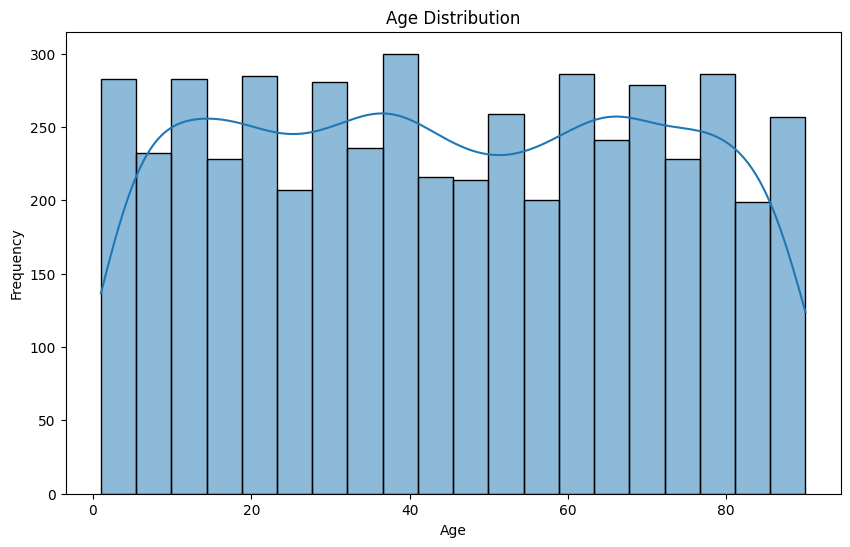

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

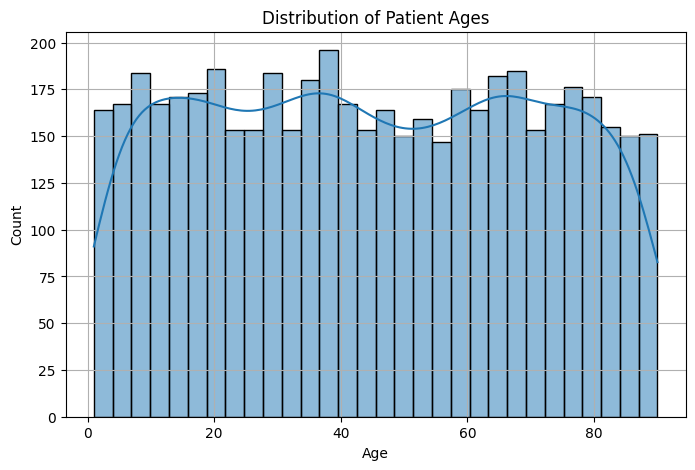

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribution of Patient Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.show()


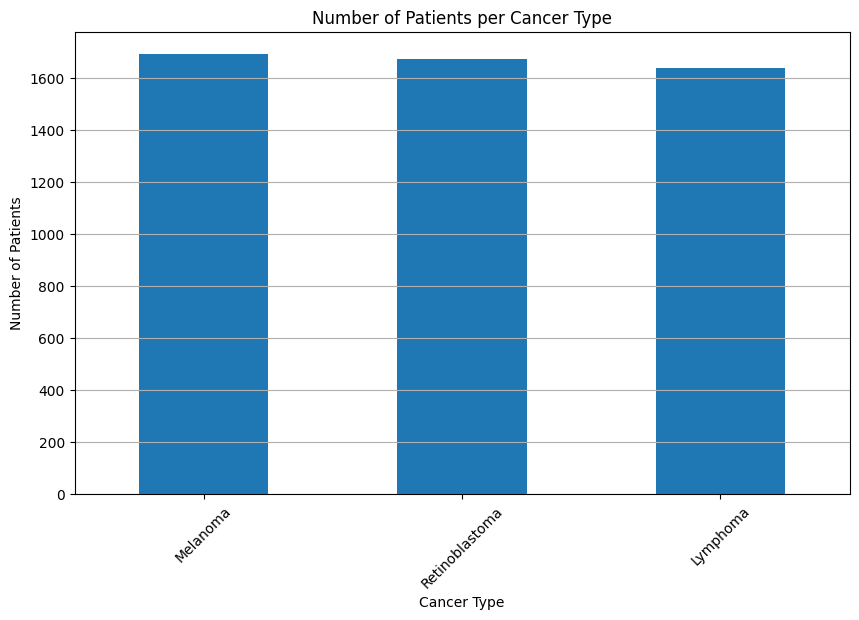

In [28]:
plt.figure(figsize=(10, 6))
df['Cancer_Type'].value_counts().plot(kind='bar')
plt.title("Number of Patients per Cancer Type")
plt.xlabel("Cancer Type")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


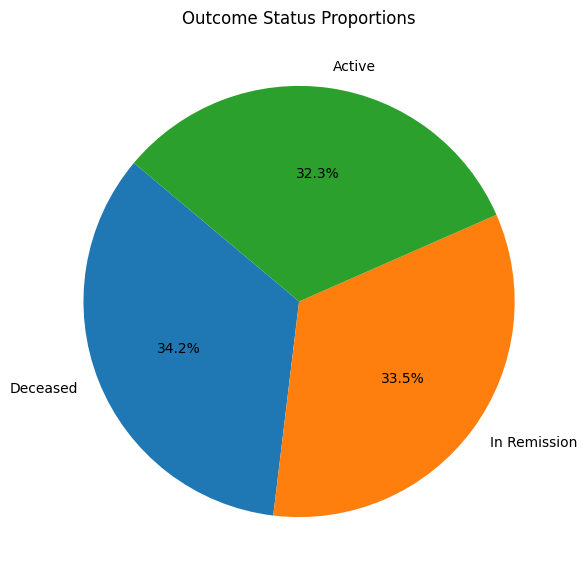

In [29]:
plt.figure(figsize=(7, 7))
df['Outcome_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Outcome Status Proportions")
plt.ylabel('')
plt.show()


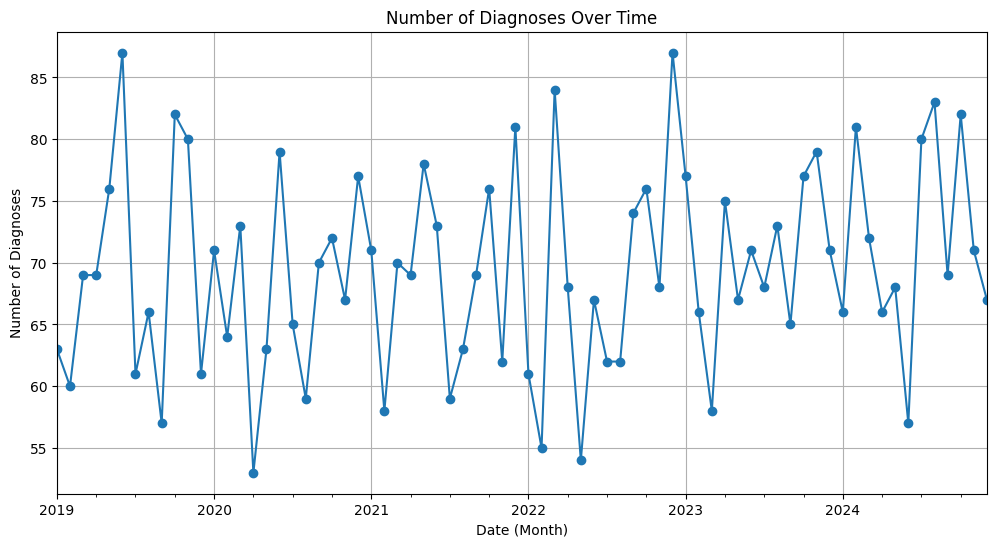

In [30]:
diagnosis_over_time = df['Date_of_Diagnosis'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12, 6))
diagnosis_over_time.plot(kind='line', marker='o')
plt.title("Number of Diagnoses Over Time")
plt.xlabel("Date (Month)")
plt.ylabel("Number of Diagnoses")
plt.grid(True)
plt.show()

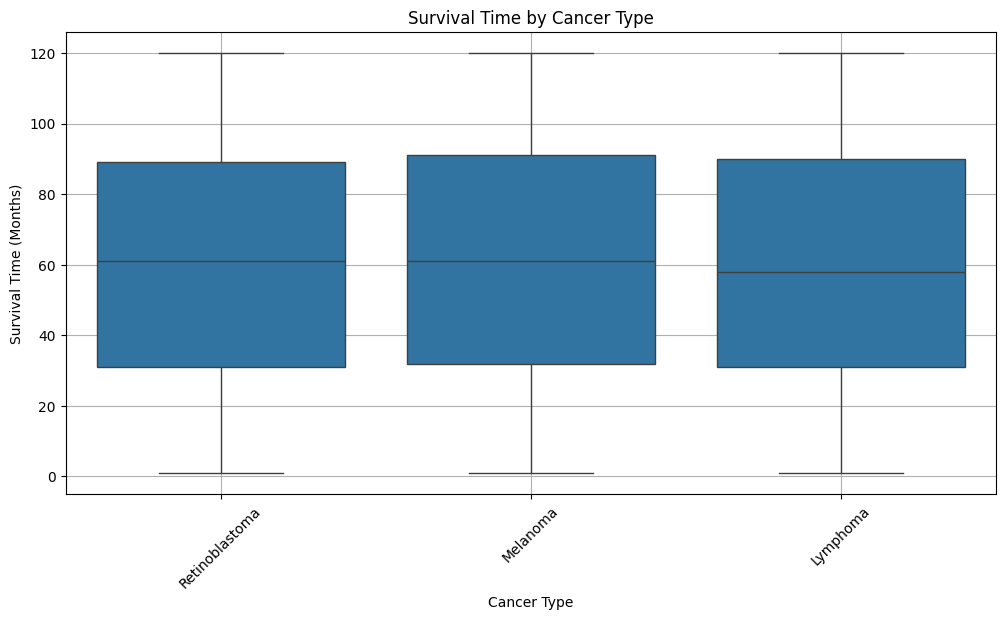

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cancer_Type', y='Survival_Time_Months', data=df)
plt.title("Survival Time by Cancer Type")
plt.xlabel("Cancer Type")
plt.ylabel("Survival Time (Months)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

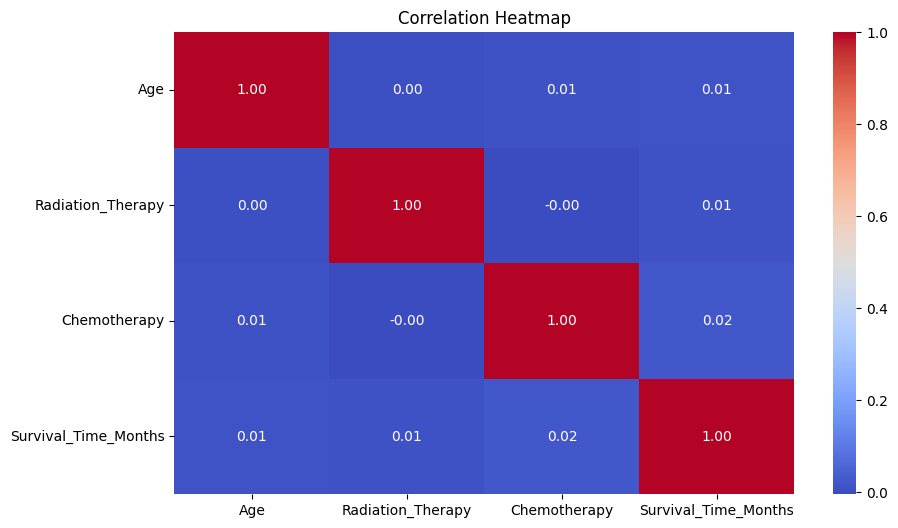

In [32]:
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Section 5: Grouping & Aggregation**

In [33]:
df.groupby('Gender')['Survival_Time_Months'].mean()

,Survival_Time_Months
Gender,
F,61.786855
M,60.804479


In [36]:
df.groupby('Treatment_Type')['Survival_Time_Months'].mean()

,Survival_Time_Months
Treatment_Type,
Chemotherapy,61.016216
Radiation,60.554952
Surgery,60.577129


In [41]:
df['Country'].value_counts().head(1)

,count
Country,
South Africa,544


In [42]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Cancer_Type', 'Laterality',
       'Date_of_Diagnosis', 'Stage_at_Diagnosis', 'Treatment_Type',
       'Surgery_Status', 'Radiation_Therapy', 'Chemotherapy', 'Outcome_Status',
       'Survival_Time_Months', 'Genetic_Markers', 'Family_History', 'Country'],
      dtype='object')

In [43]:
df.groupby('Surgery_Status')['Radiation_Therapy'].mean()

,Radiation_Therapy
Surgery_Status,
False,35.076327
True,35.804314


In [44]:
df['Stage_at_Diagnosis'].value_counts()

,count
Stage_at_Diagnosis,
Stage II,1287
Stage III,1281
Stage IV,1242
Stage I,1190


In [47]:
df[(df['Age'] > 60) & (df['Cancer_Type'].str.lower() == 'bilateral')].shape[0]


0

In [48]:
remission_df = df[df['Outcome_Status'].str.lower() == 'remission']
remission_rate = remission_df['Country'].value_counts() / df['Country'].value_counts()
remission_rate.sort_values(ascending=False).head(5)

,count
Country,
Australia,NaN
Brazil,NaN
Canada,NaN
France,NaN
Germany,NaN
